In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

!pip install IPython
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [103]:
data=pd.read_csv('C:/Users/hayoung/Desktop/인사이트/과제 제출/insight-9th/homework/session3/data/train.csv')

In [104]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [106]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'number6')

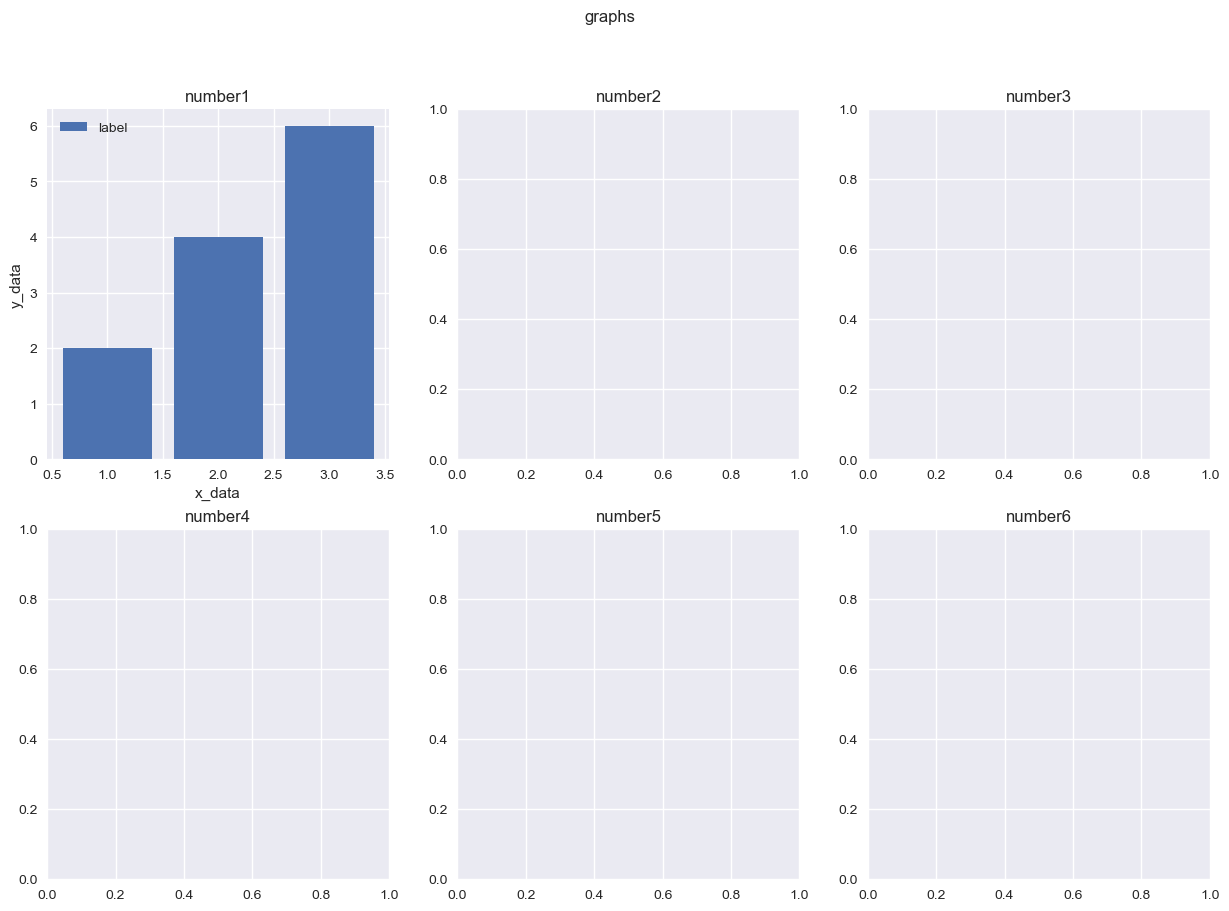

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

x=[1,2,3]
y=[2,4,6]
fig,ax=plt.subplots(2,3,figsize=(15,10))
fig.suptitle('graphs')

ax[0,0].bar(x,y,label='label')
ax[0,0].set_title('number1')
ax[0,0].legend()
ax[0,0].set(xlabel='x_data',ylabel='y_data')

ax[0,1].set_title('number2')

ax[0,2].set_title('number3')

ax[1,0].set_title('number4')

ax[1,1].set_title('number5')

ax[1,2].set_title('number6')

<Figure size 800x550 with 0 Axes>

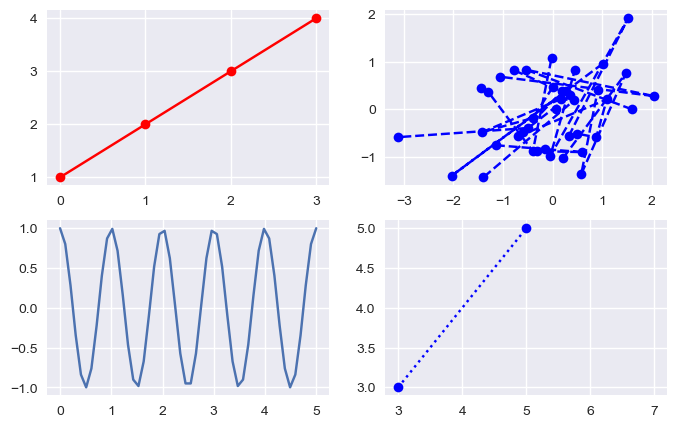

In [108]:
fig = plt.figure()
fig.suptitle('figure sample plots')

fig, ax_lst = plt.subplots(2,2,figsize=(8,5))

ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4, 10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2 * np.pi * np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')
plt.show()

In [109]:
parameters={
    'axes.titlesize':25,
    'axes.labelsize':20,
    'ytick.labelsize':20
}
plt.rcParams.update(parameters)

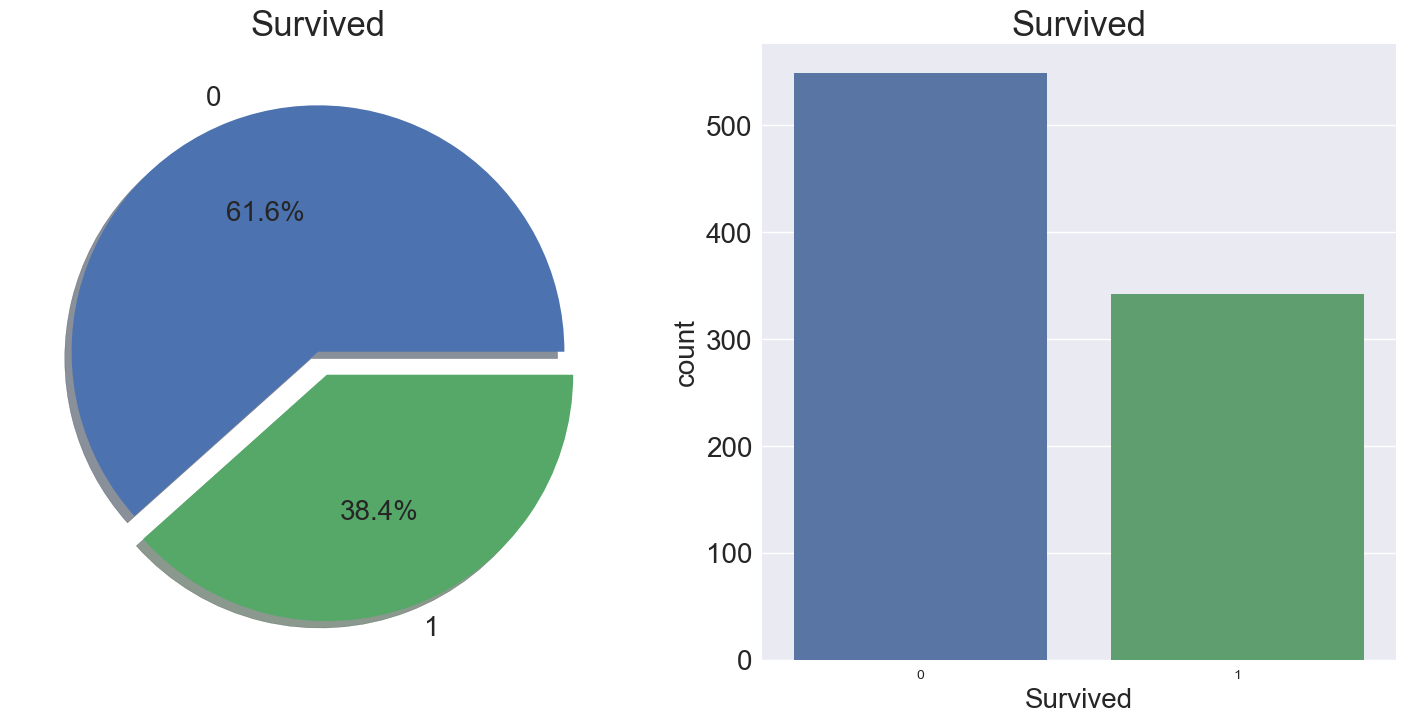

In [110]:
f, ax=plt.subplots(1,2,figsize=(18, 8))

data['Survived'].value_counts().plot.pie(explode=[0, 0.1], 
                                         autopct='%1.1f%%',
                                         ax=ax[0],
                                         shadow=True,
                                         fontsize=20)
ax[0].set_title('Survived') 
ax[0].set_ylabel('')


sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [111]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

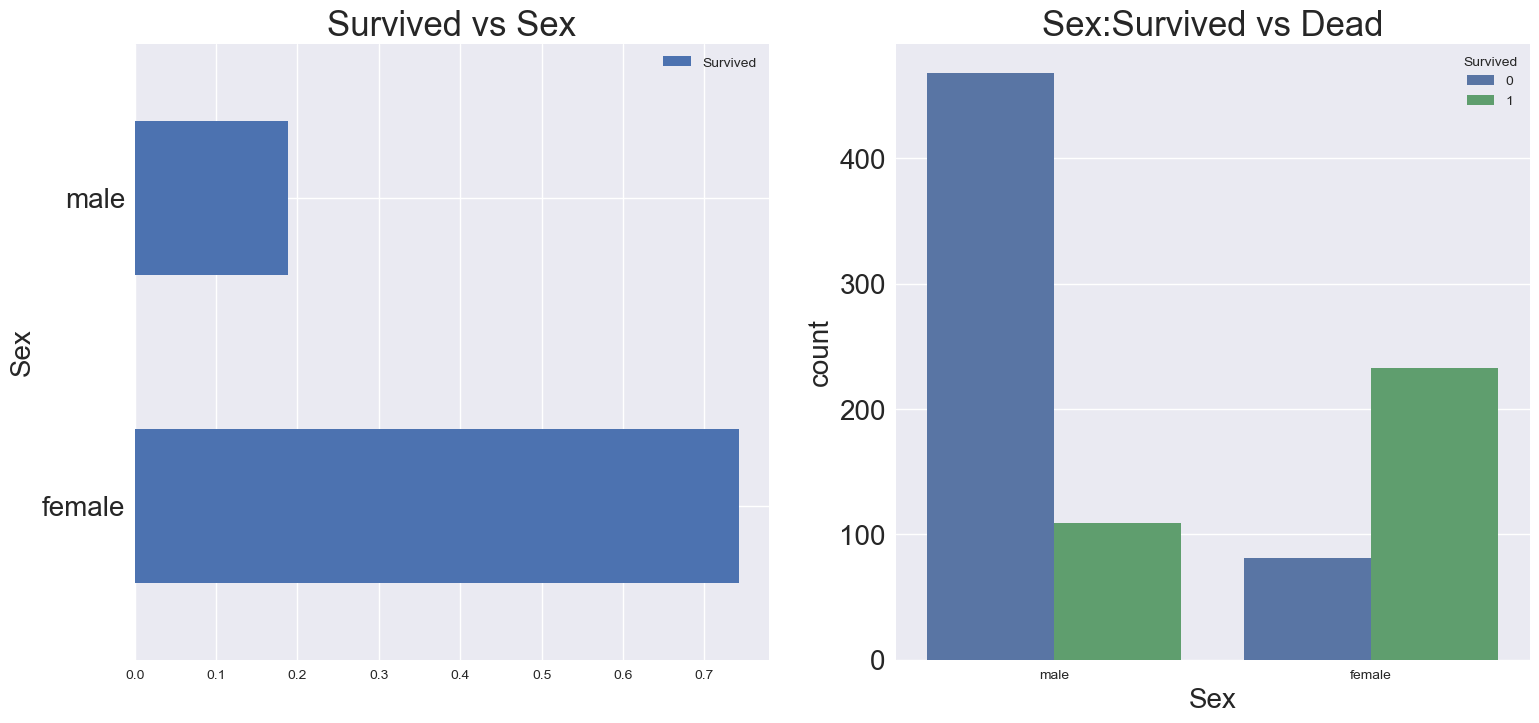

In [112]:
f, ax=plt.subplots(1,2,figsize=(18, 8))

data[['Sex','Survived']].groupby(['Sex']).mean().plot.barh(ax=ax[0]) 
ax[0].set_title('Survived vs Sex') 

sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

In [113]:
pd.crosstab(data.Pclass,data.Survived,
            margins=True).style.background_gradient(
    cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


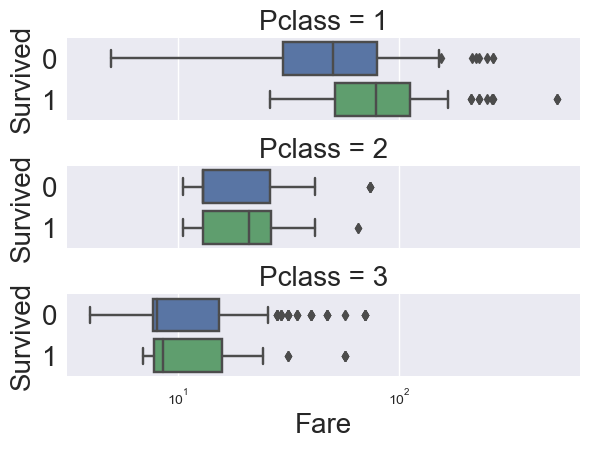

In [114]:
plot=sns.catplot(x="Fare",y="Survived",row="Pclass",
                kind="box",orient="h",height=1.5,aspect=4,
                data=data.query("Fare > 0")) 
plot.set(xscale="log")

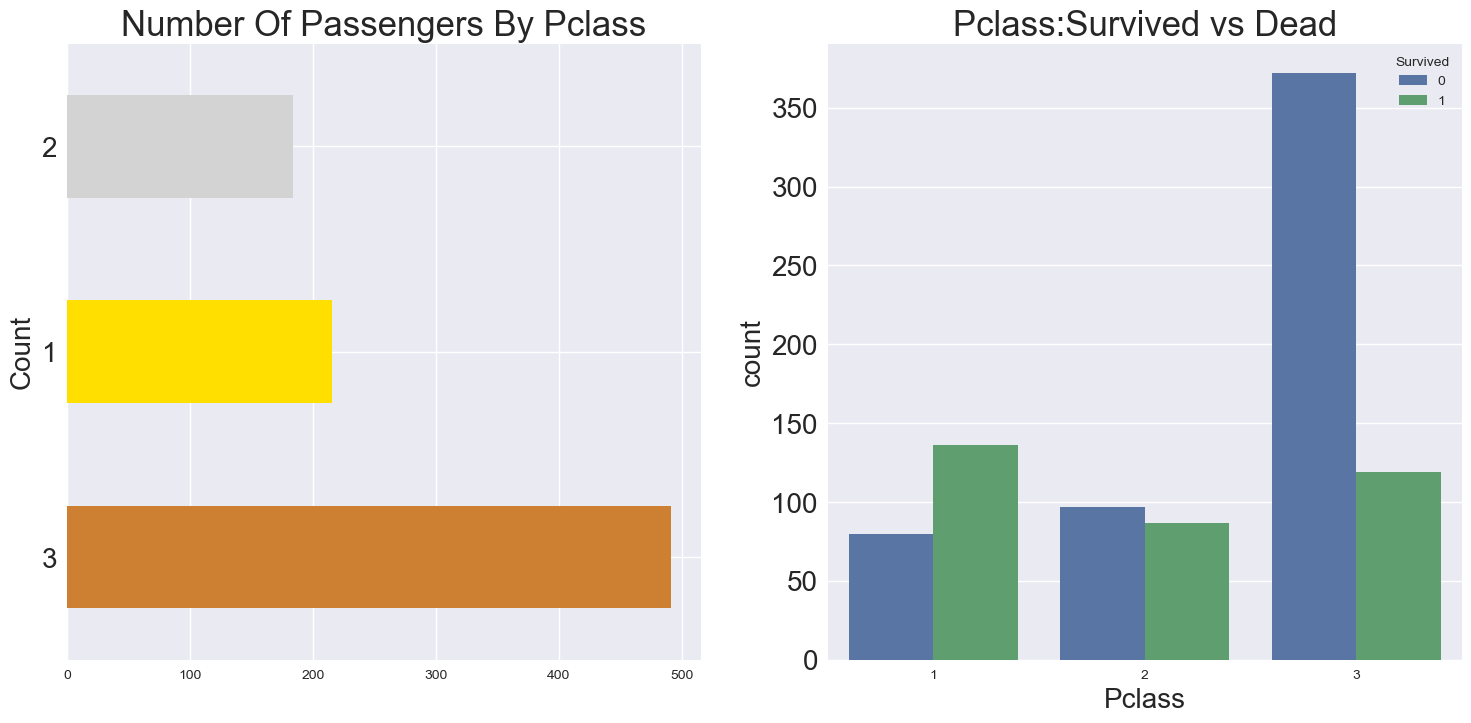

In [115]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Pclass'].value_counts().plot.barh(
    color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [116]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,
            margins=True).style.background_gradient(cmap='summer_r')

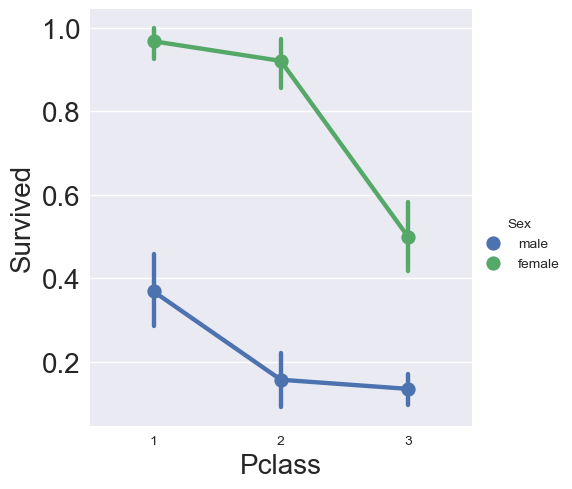

In [117]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data) 
plt.show()

In [118]:
print('Oldest Passenger was of:',data['Age'].max(),'Years') 
print('Youngest Passenger was of:',data['Age'].min(),'Years') 
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


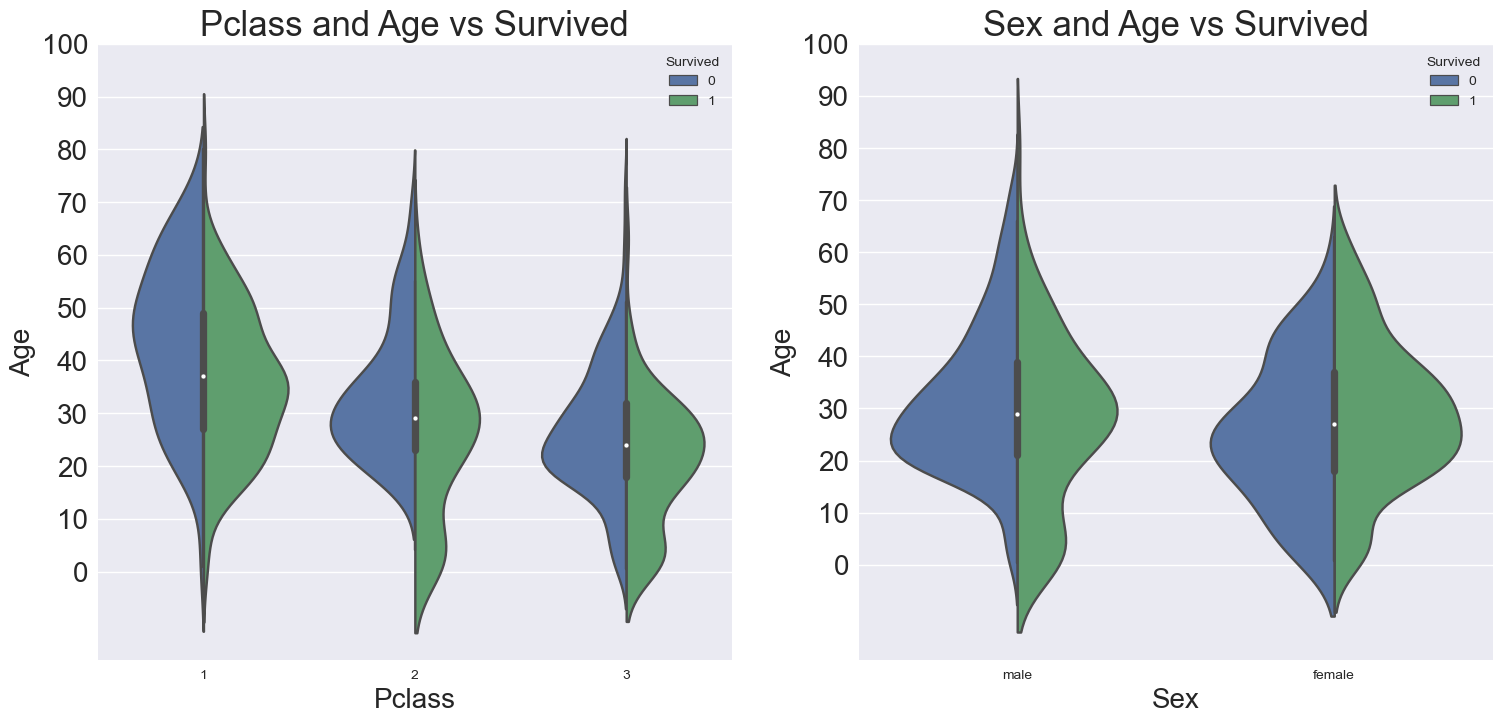

In [119]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot('Pclass','Age',hue='Survived',
              data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived',data=data,
              split=True)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [120]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [121]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(
    cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [122]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 
                         'Major', 'Lady', 'Countess', 
                         'Jonkheer', 'Col','Rev', 'Capt', 
                         'Sir', 'Don'], 
                        ['Miss', 'Miss', 'Miss', 'Mr', 
                         'Mr', 'Mrs', 'Mrs', 'Other', 
                         'Other','Other', 'Mr', 'Mr', 'Mr'],
                        inplace=True)

In [123]:
data.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [124]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [125]:
data.Age.isnull().any()

False

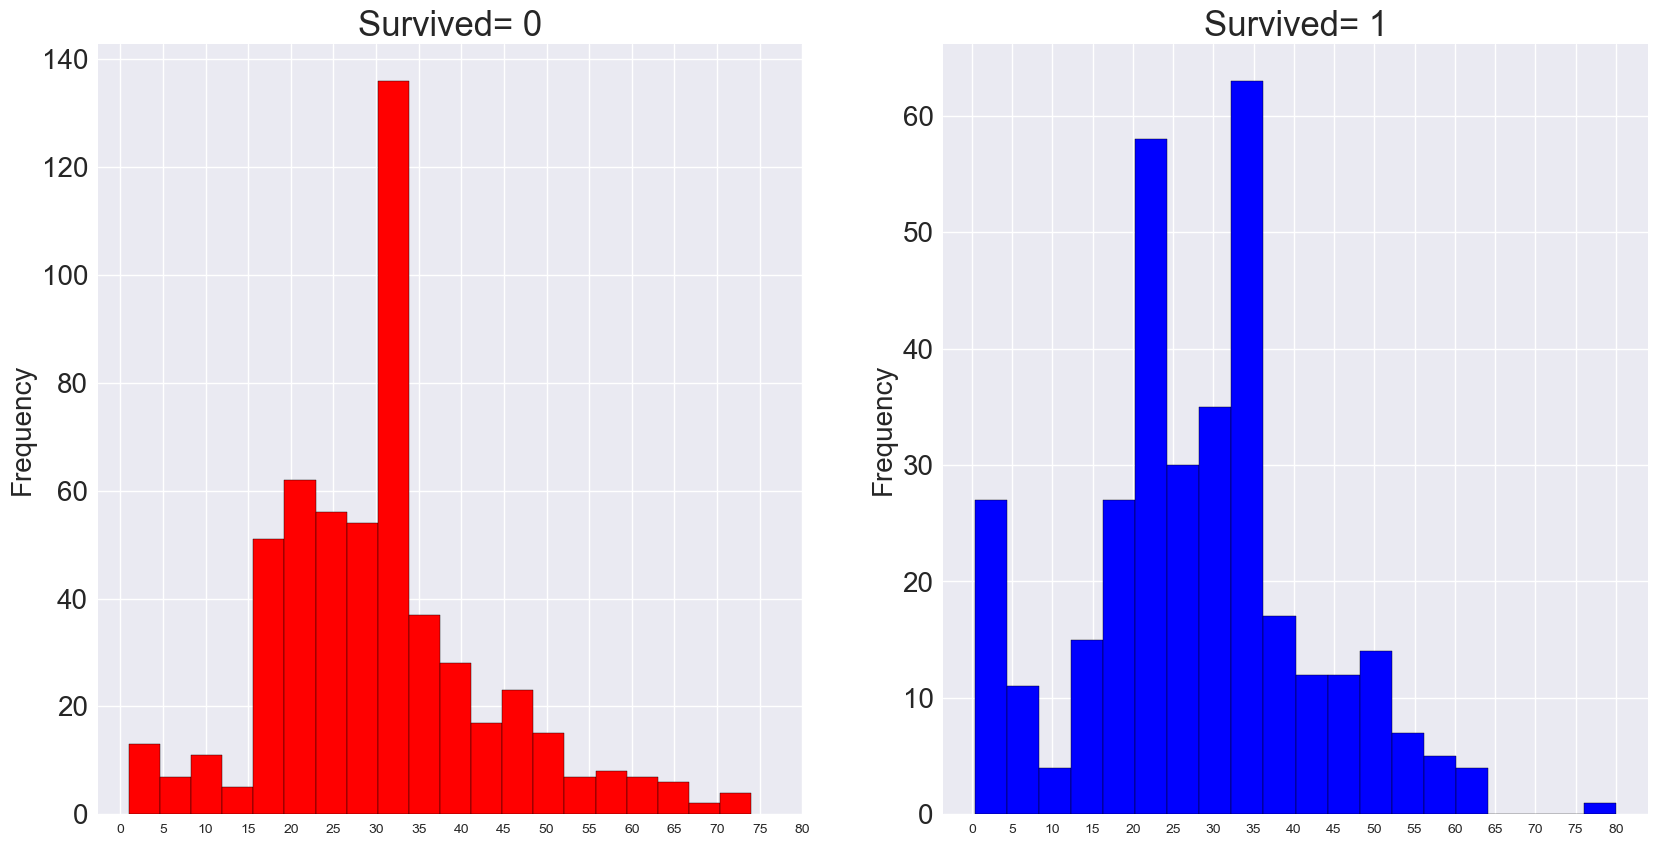

In [126]:
f,ax = plt.subplots(1, 2, figsize=(20, 10))

data[data['Survived'] == 0].Age.plot.hist(ax=ax[0],bins=20,
                                          edgecolor='black',
                                          color='red')
ax[0].set_title('Survived= 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1],
                                          color='blue',bins=20,
                                          edgecolor='black')
ax[1].set_title('Survived= 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

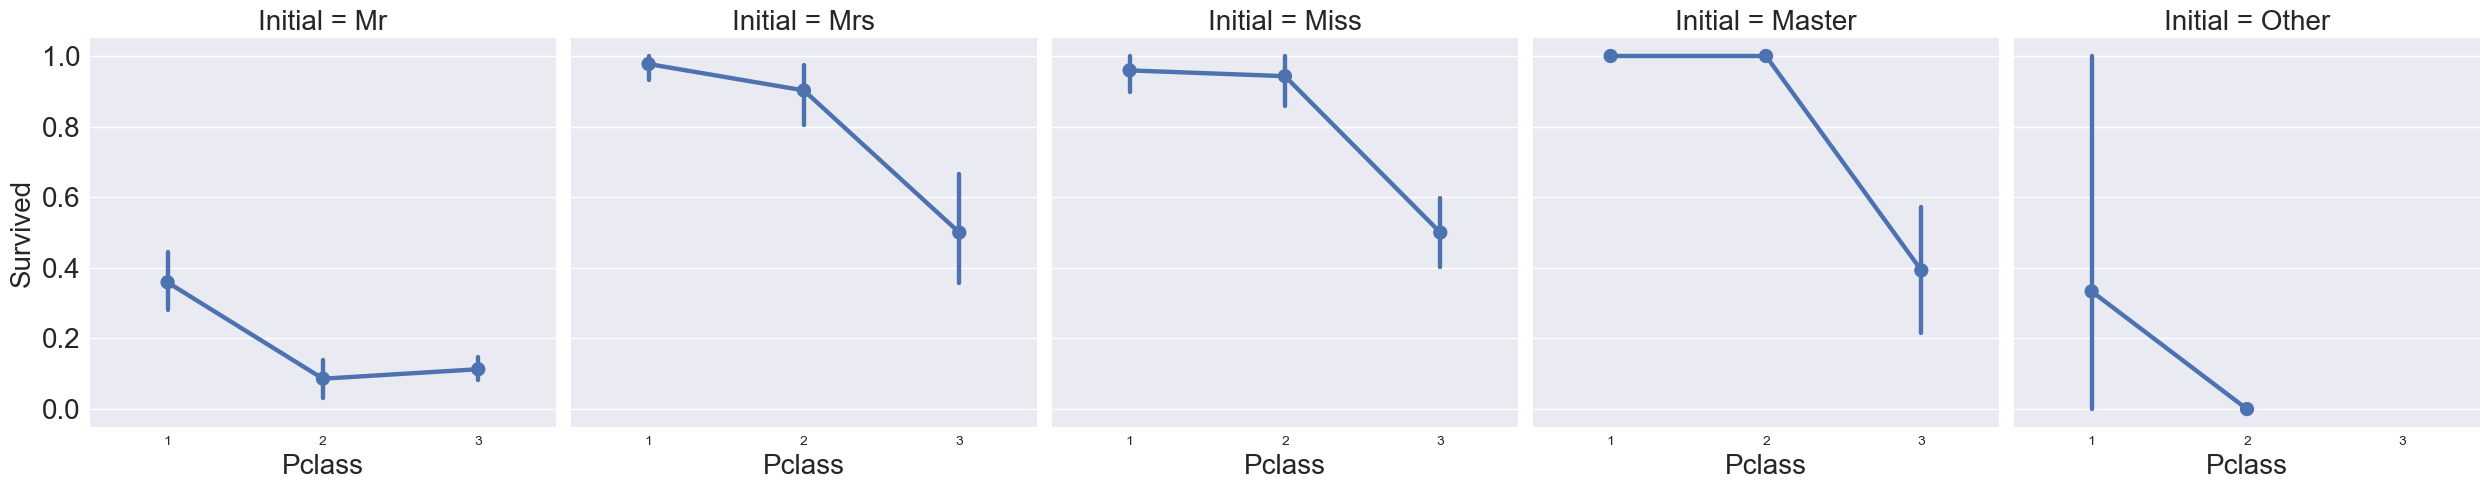

In [127]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

In [128]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived],
            margins=True).style.background_gradient(cmap='summer_r')

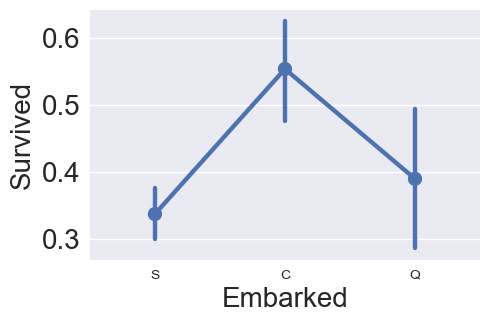

In [129]:
sns.factorplot('Embarked','Survived',data=data)
fig = plt.gcf() 
fig.set_size_inches(5, 3) 
plt.show()

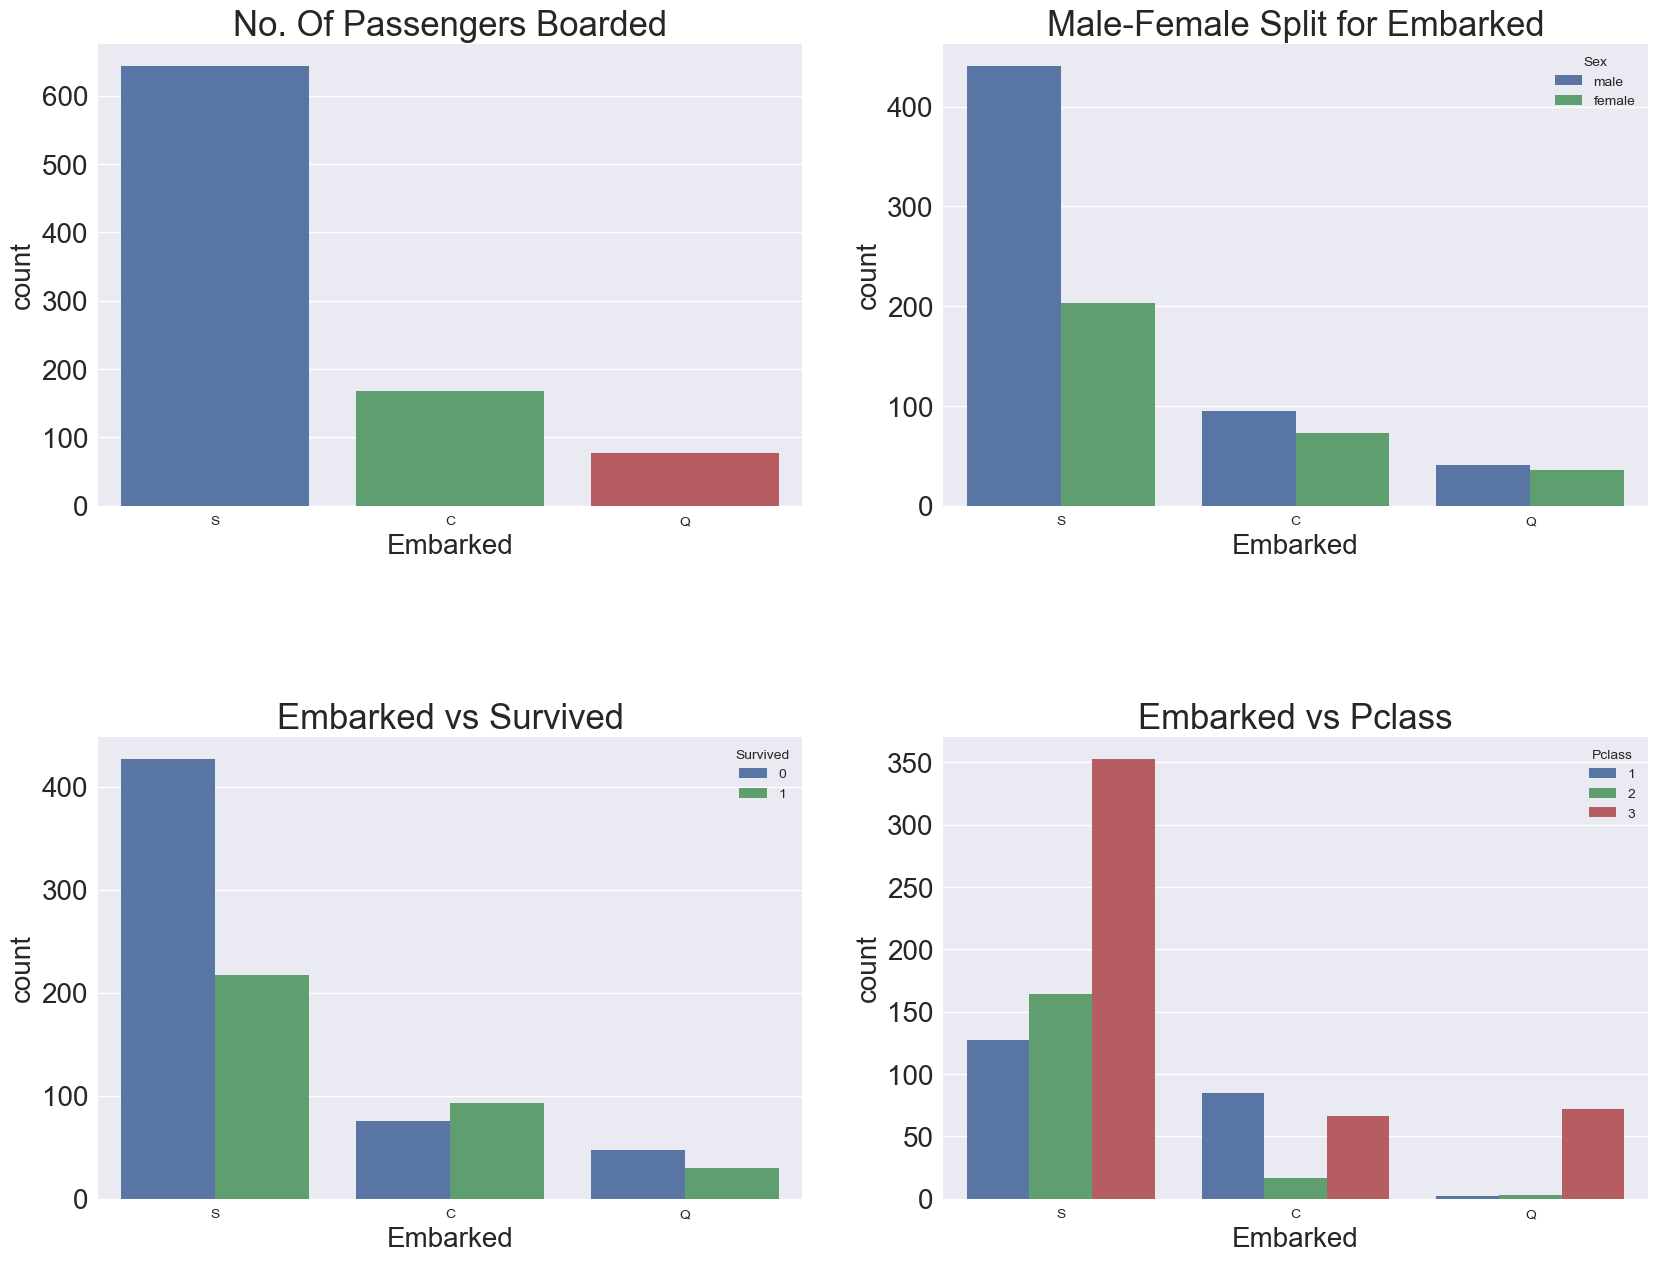

In [130]:
f,ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=data,ax=ax[0, 0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

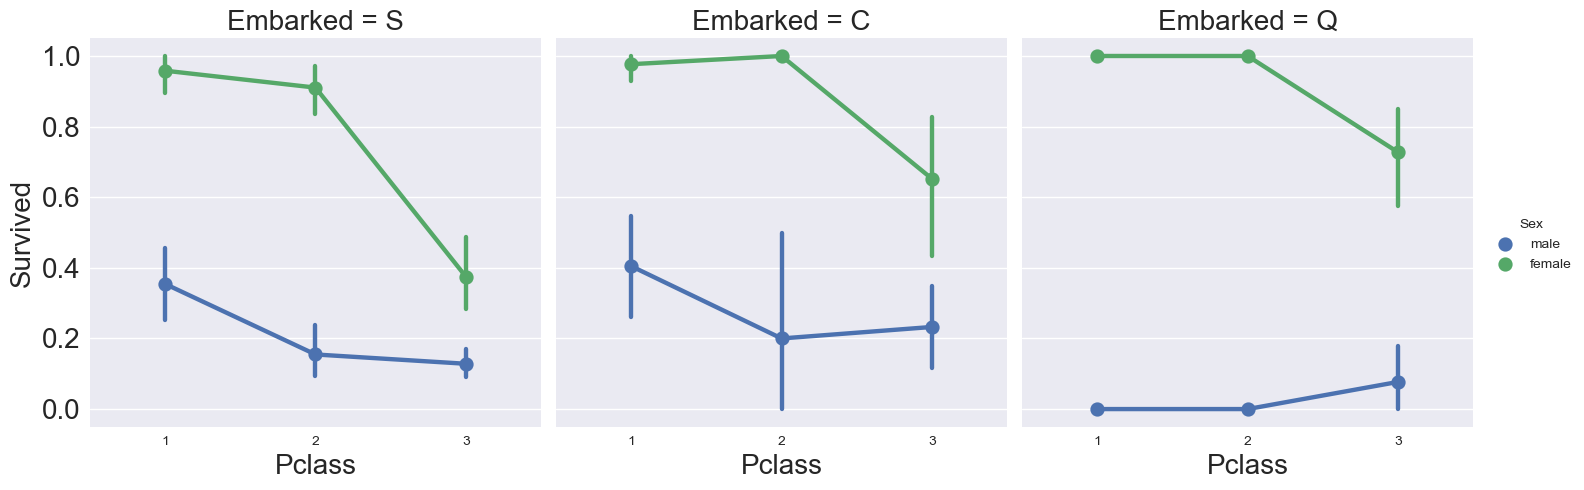

In [131]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

In [132]:
data['Embarked'].fillna('S',inplace=True)

In [133]:
data.Embarked.isnull().any()

False

In [134]:
pd.crosstab([data.SibSp],
            data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'SibSp vs Survived')

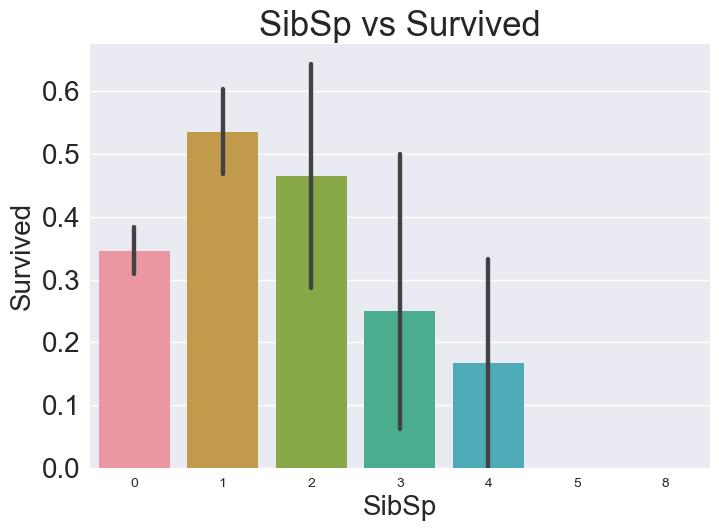

In [135]:
sns.barplot('SibSp','Survived',data=data)
plt.title('SibSp vs Survived')

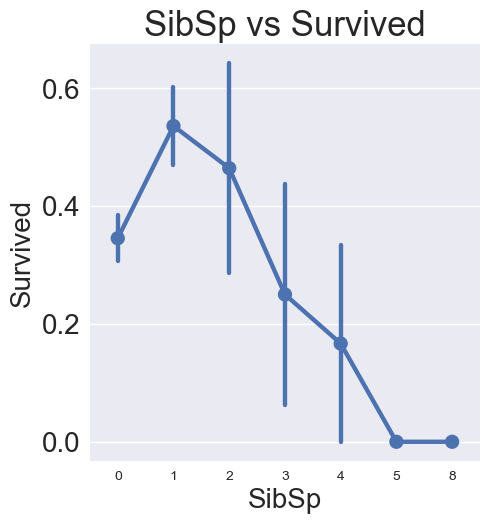

In [136]:
sns.factorplot('SibSp','Survived',data=data)
plt.title('SibSp vs Survived')
plt.show()

In [137]:
pd.crosstab(data.SibSp,
            data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [138]:
pd.crosstab(data.Parch,
            data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


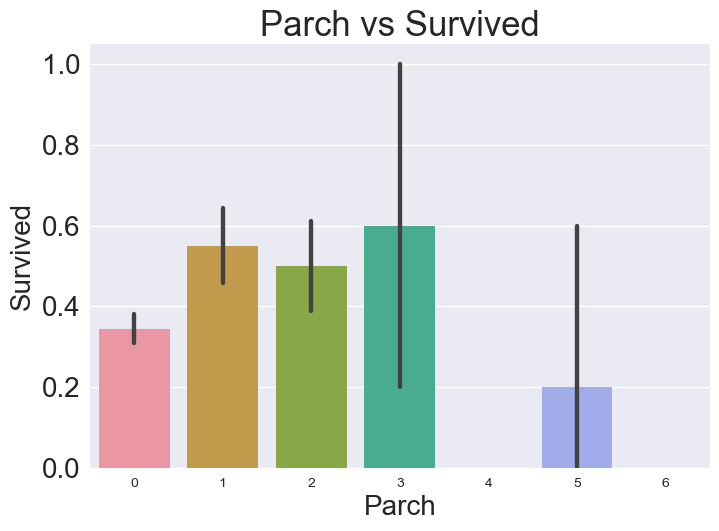

In [139]:
sns.barplot('Parch','Survived',data=data)
plt.title('Parch vs Survived')
plt.show()

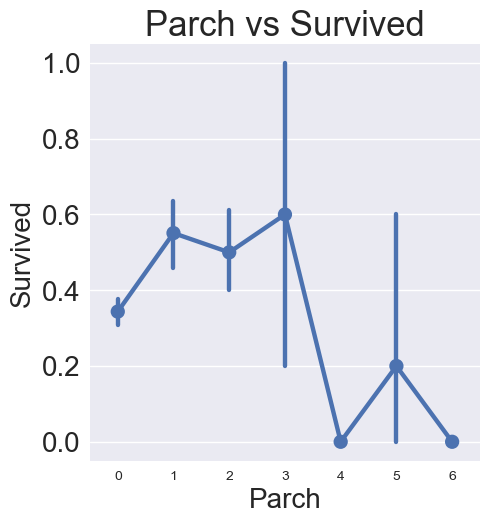

In [140]:
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
plt.title('Parch vs Survived')
plt.show()

In [141]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


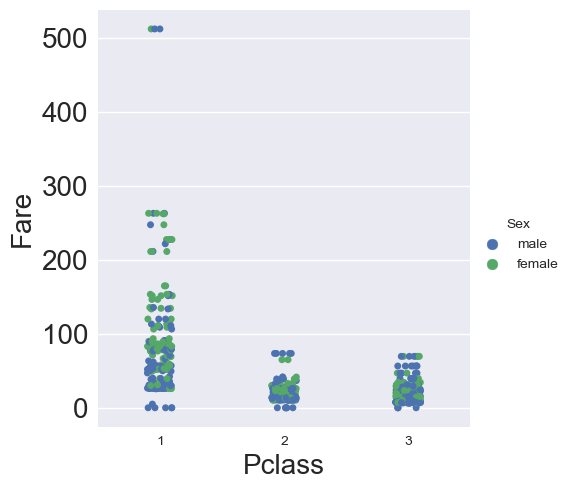

In [142]:
sns.catplot(x='Pclass',y='Fare',hue='Sex',data=data)

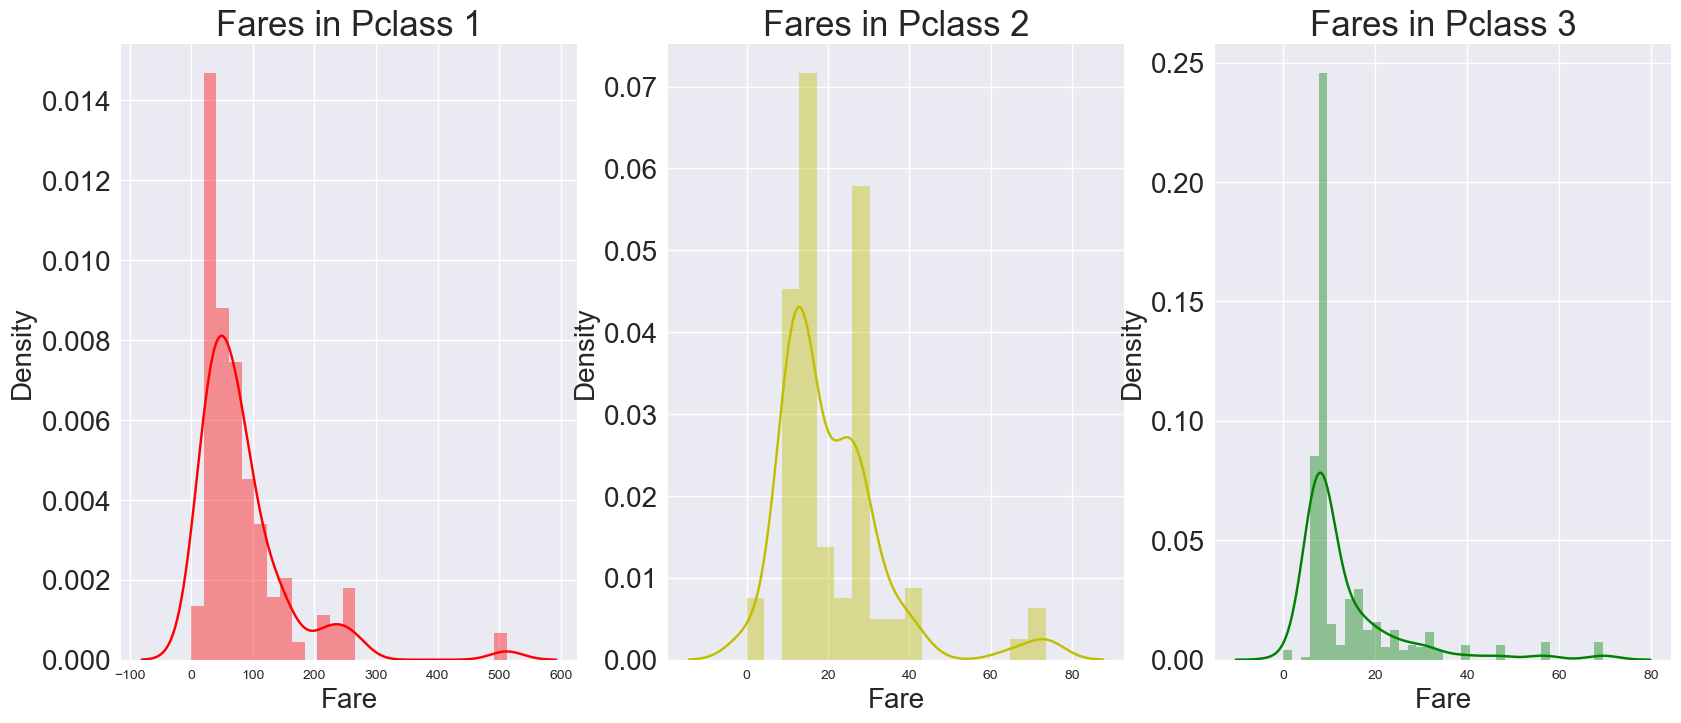

In [143]:
f,ax = plt.subplots(1,3,figsize=(20, 8))

sns.distplot(data[data['Pclass'] == 1].Fare,ax=ax[0],color='r')
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass'] == 2].Fare,ax=ax[1],color='y')
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass'] == 3].Fare,ax=ax[2],color='g')
ax[2].set_title('Fares in Pclass 3')

plt.show()

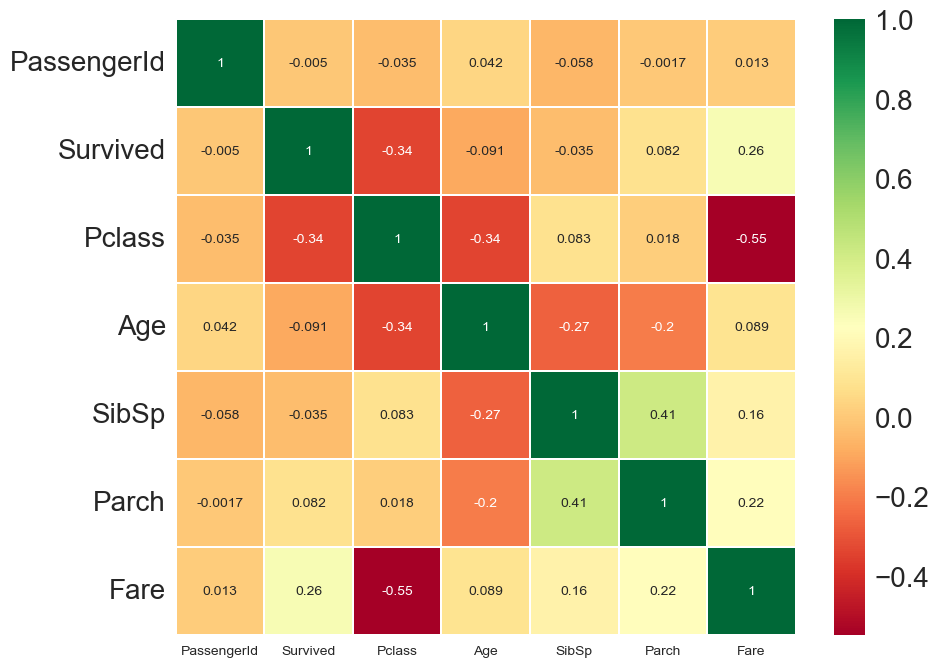

In [144]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

In [145]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16) & (data['Age']<= 32),'Age_band']=1
data.loc[(data['Age']>32) & (data['Age']<= 48),'Age_band']=2
data.loc[(data['Age']>48) & (data['Age']<= 64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [146]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


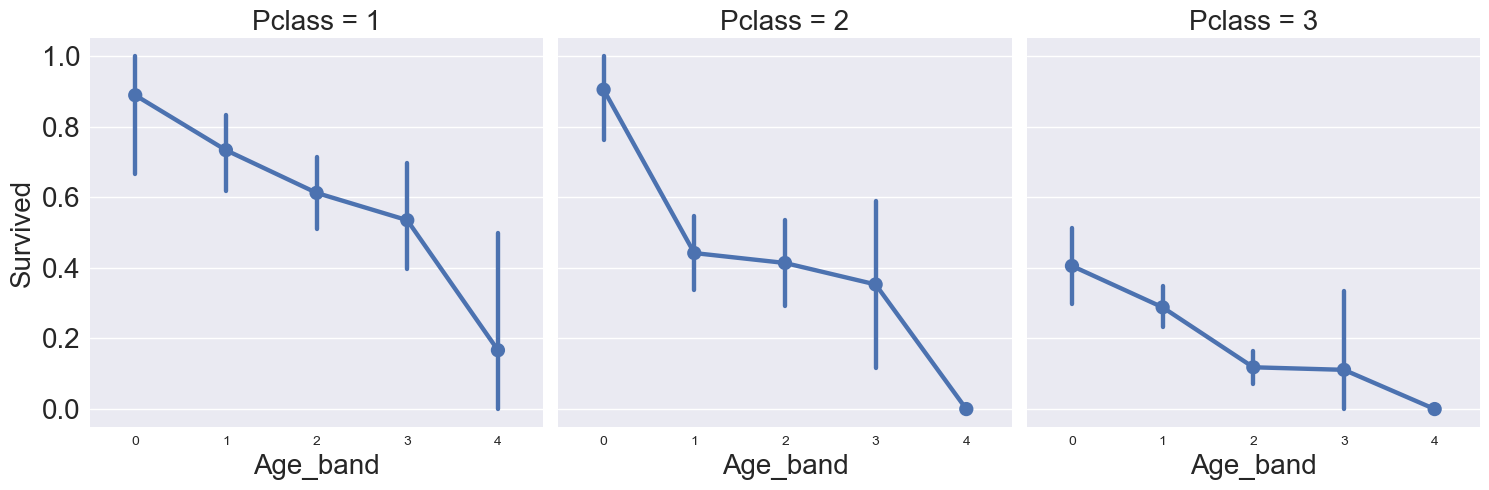

In [147]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

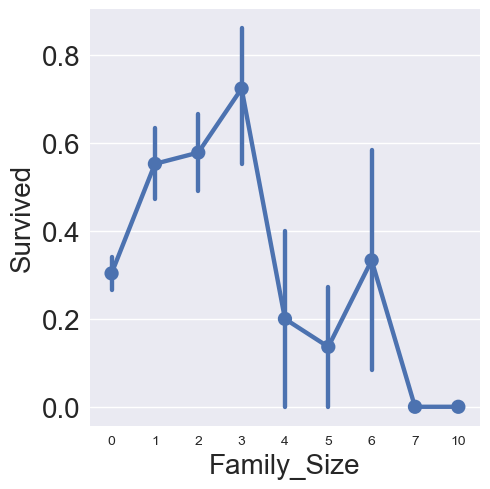

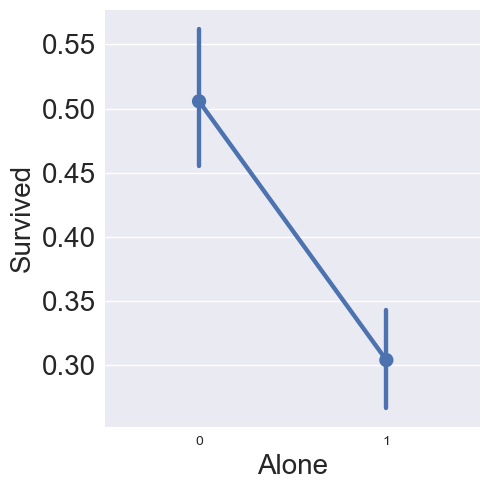

In [148]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']  #family size
data['Alone']=0
data.loc[data.Family_Size == 0,'Alone']=1  #Alone

sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

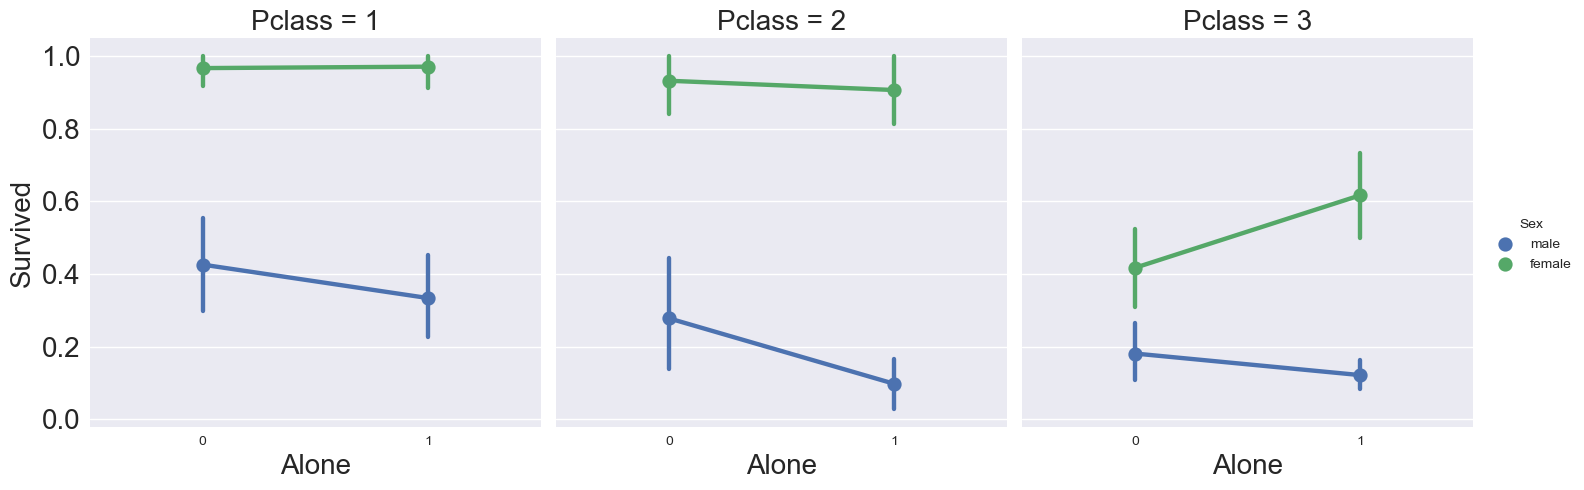

In [149]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

In [150]:
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [151]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<= 31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

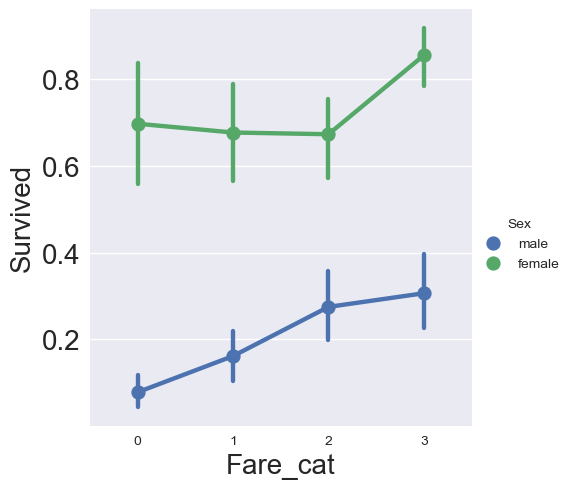

In [152]:
sns.factorplot('Fare_cat','Survived',data=data, hue='Sex')
plt.show()

In [153]:
data['Sex'].replace(['male', 'female'],[0, 1],inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0, 1, 2, 3, 4],inplace=True)

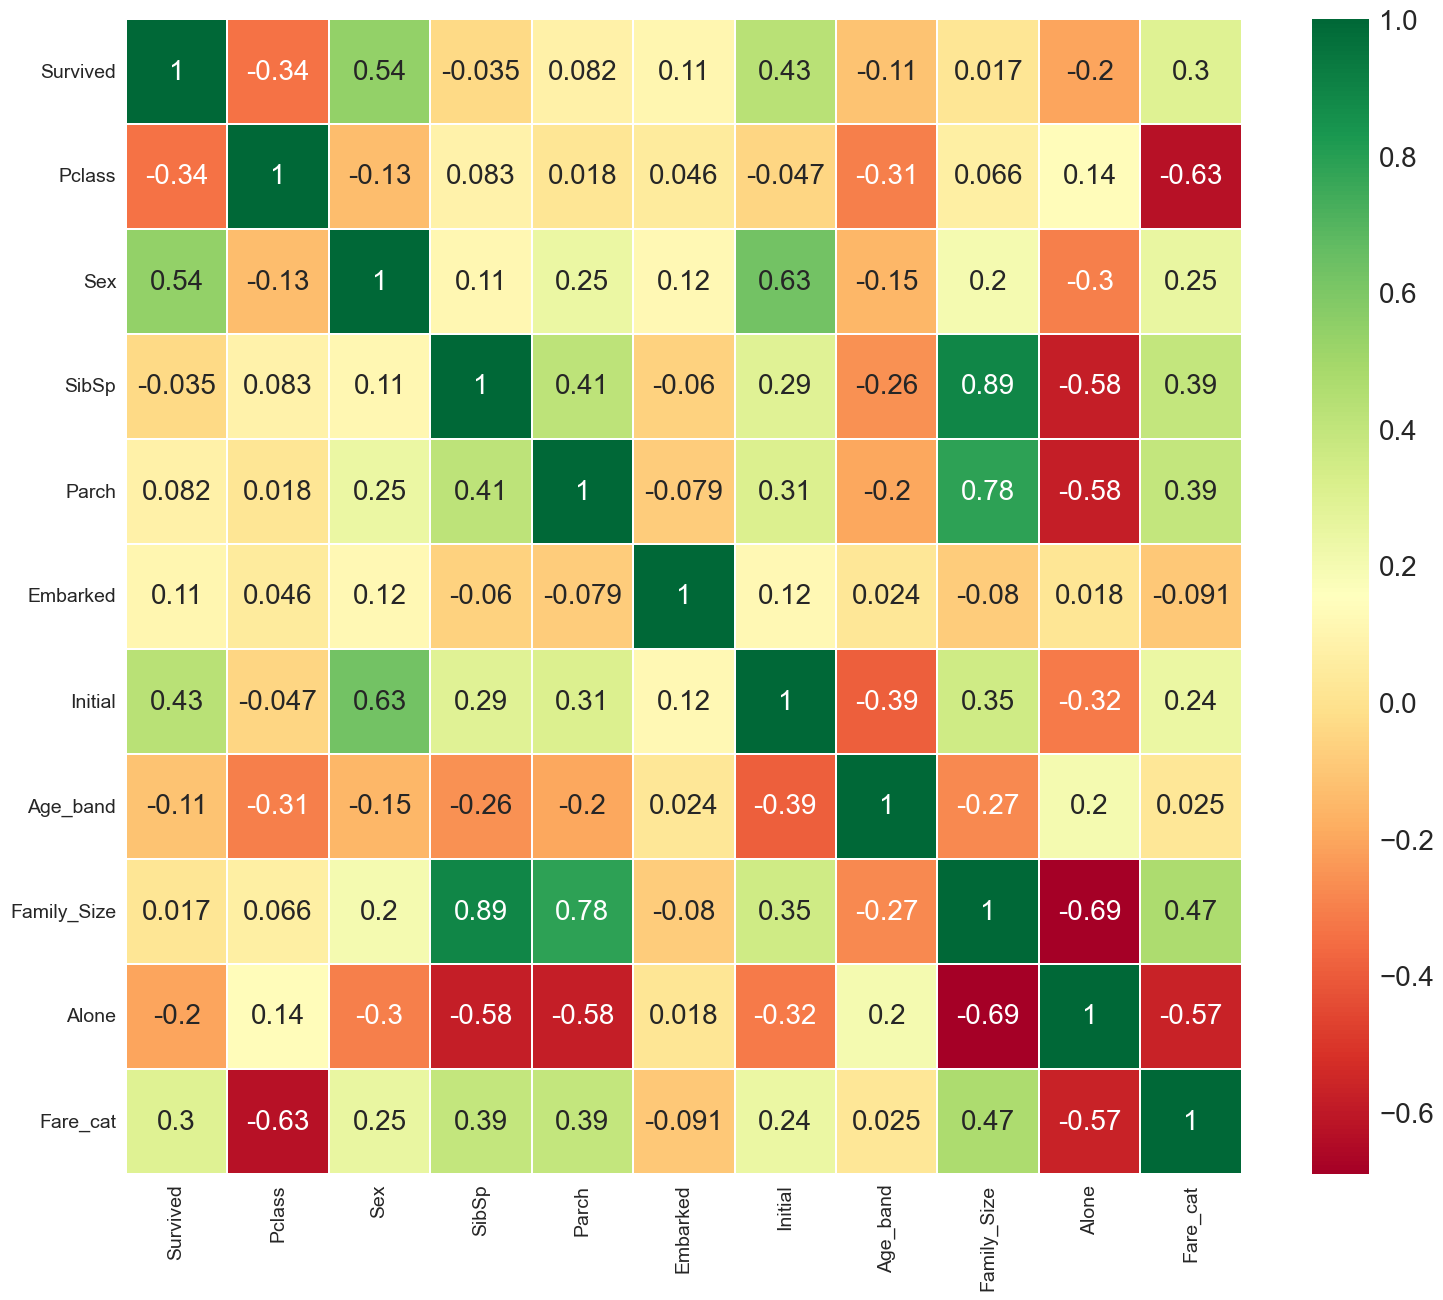

In [154]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [155]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(axis=0),columns=['A','B','C','D'], index=np.arange(0,100,10))
df

,A,B,C,D
0,2.055977,1.534458,-0.218946,0.604815
10,2.637288,0.778189,-1.138437,-0.180642
20,1.826975,0.812414,-3.587250,-1.278370
30,2.136831,2.144996,-2.261164,-2.096674
40,1.953869,1.751330,-4.005538,-2.370818
50,2.180662,2.219271,-4.251720,-2.478156
60,2.256472,1.889169,-4.637945,-2.450107
70,2.236619,2.054626,-5.096512,-3.724872
80,2.326288,3.118608,-5.483630,-2.764971
90,1.758911,3.804566,-8.906388,-3.698269


<AxesSubplot:>

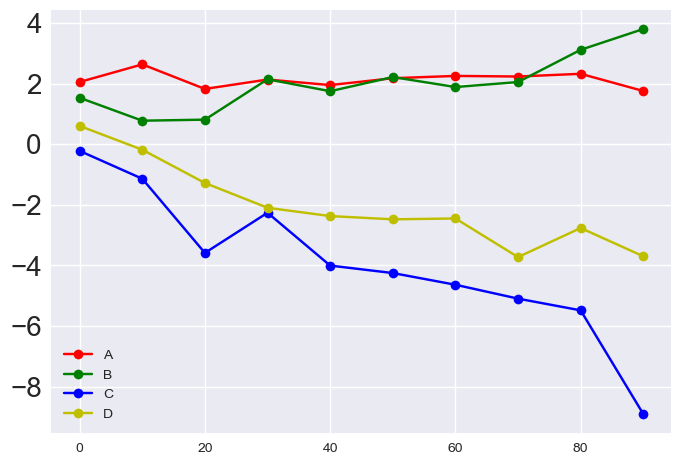

In [156]:
df.plot(marker='o',color=['r','g','b','y'])

In [ ]:
iris = sns.load_dataset("iris") 

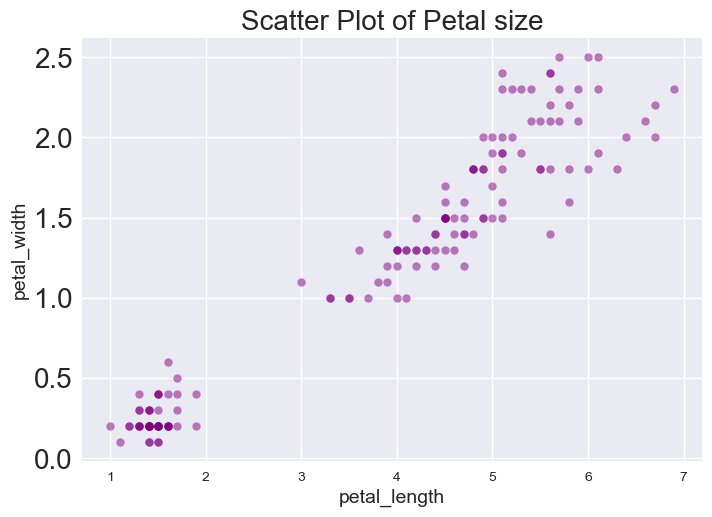

In [158]:
plt.plot('petal_length','petal_width',  data=iris,
         linestyle='none', marker='o', markersize=6, color='purple', alpha=0.5)
plt.title('Scatter Plot of Petal size',fontsize=20)
plt.xlabel('petal_length',fontsize=14)
plt.ylabel('petal_width',fontsize=14)
plt.show()

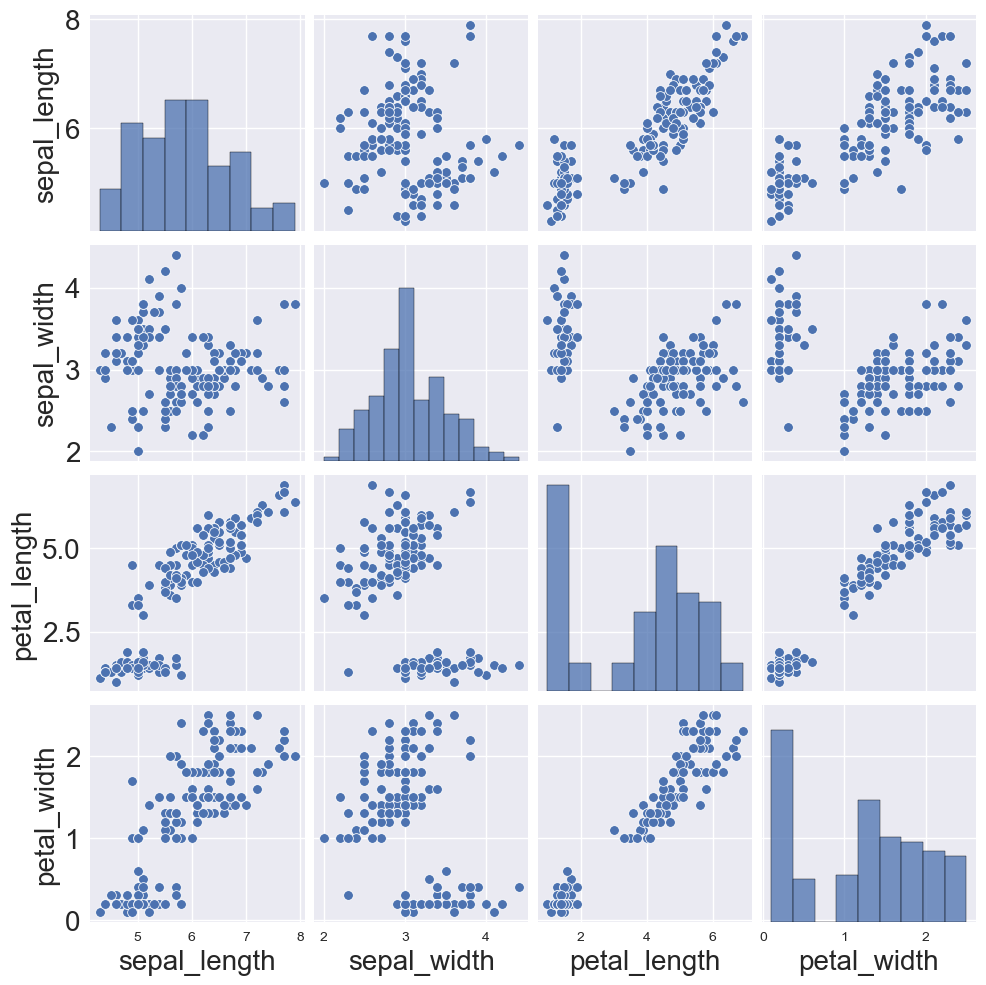

In [159]:
sns.pairplot(iris)

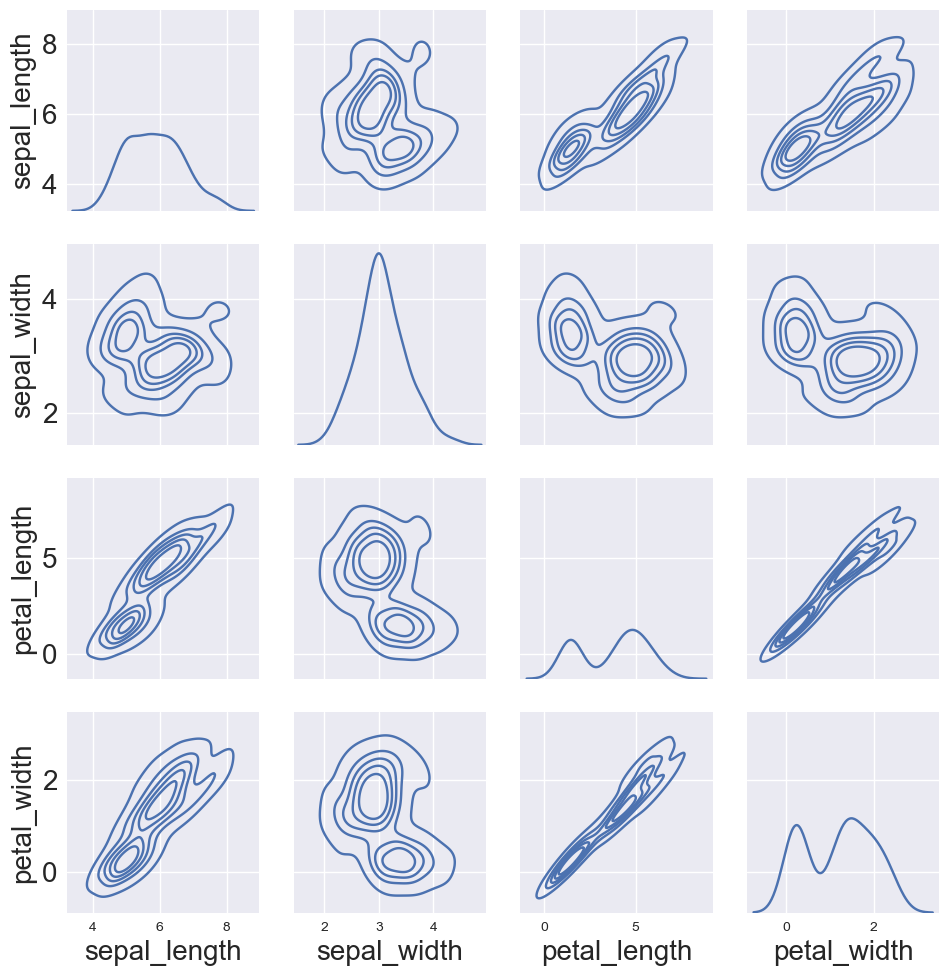

In [160]:
g=sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot,n_levels=6)

In [161]:
#복붙함 ㅎㅁㅎ~~
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

Text(0, 0.5, 'weight')

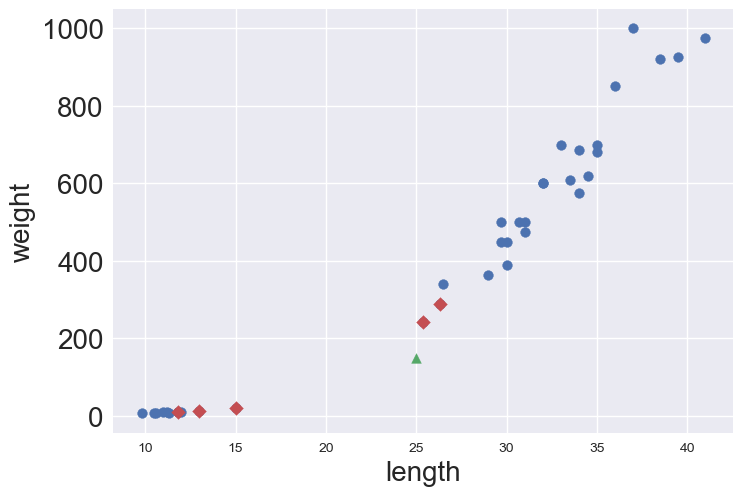

In [162]:
import numpy as np

fish_data=np.column_stack((fish_length,fish_weight))
fish_target= np.concatenate((np.ones(35),np.zeros(14)))
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data,fish_target,random_state=42)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)


import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')

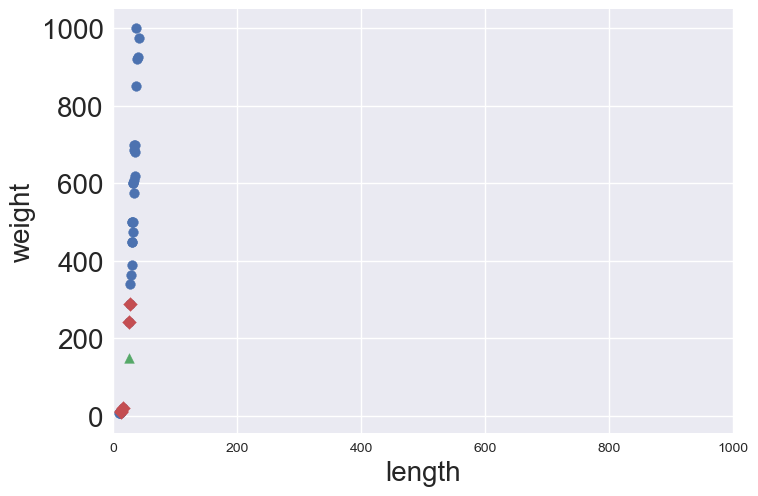

In [163]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0],
            train_input[indexes,1],marker='D')
plt.xlim((0,1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [164]:
mean=np.mean(train_input,axis=0)
std=np.std(train_input,axis=0)

In [165]:
print(mean,std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [166]:
train_scaled=(train_input-mean)/std

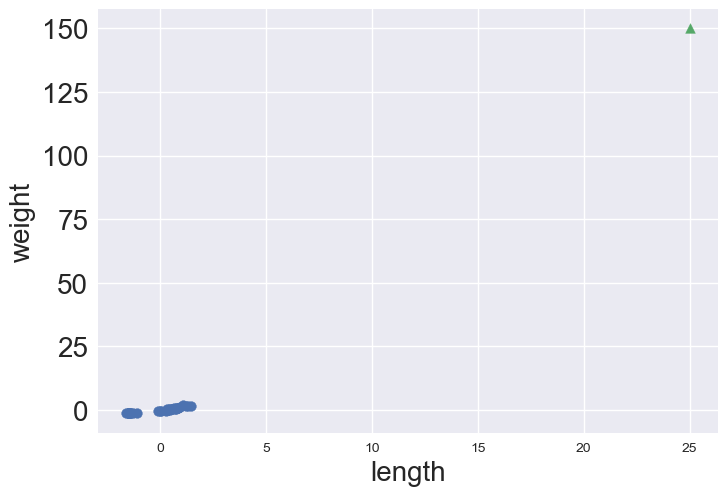

In [167]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(25,150,marker='^')
plt.xlabel("length")
plt.ylabel('weight')
plt.show()

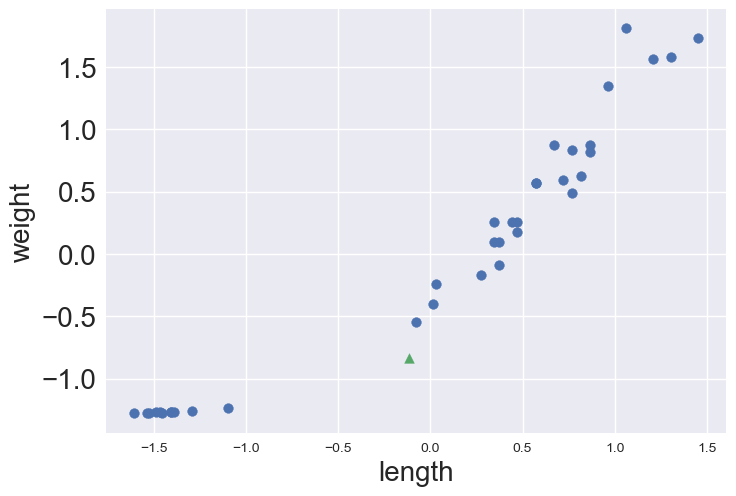

In [168]:
new=([25,150]-mean)/std
plt.scatter(train_scaled[:,0],
            train_scaled[:,1])
plt.scatter(new[0], 
            new[1],marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()